In [1]:
# IMPORT ALL MODULES

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
# We use iris dataset from sklearn
# We use Dir to know the keys

from sklearn.datasets import load_iris
iris = load_iris()
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [3]:
# Use pandas to make your DataFrame

df = pd.DataFrame(iris.data,columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [4]:
# This code to add the target

df['target'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [6]:
# We use apply and lambda function to add the flower or target names

df['flower'] = df.target.apply(lambda x: iris.target_names[x])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [7]:
df['flower'].unique() #let's see, we have 3 kind of iris's flower

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [8]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [9]:
# for make us easier, we divide each kind of flower

df0 = df[:50]
df1 = df[50:100]
df2 = df[100:]

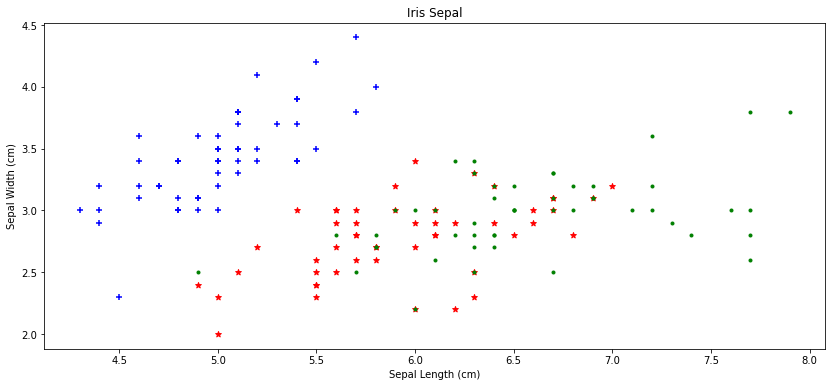

In [17]:
plt.figure(figsize=(14,6))
plt.title ('Iris Sepal')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.scatter(df0['sepal length (cm)'],df0['sepal width (cm)'],marker='+',color='blue')
plt.scatter(df1['sepal length (cm)'],df1['sepal width (cm)'],marker='*',color='red')
plt.scatter(df2['sepal length (cm)'],df2['sepal width (cm)'],marker='.',color='green')

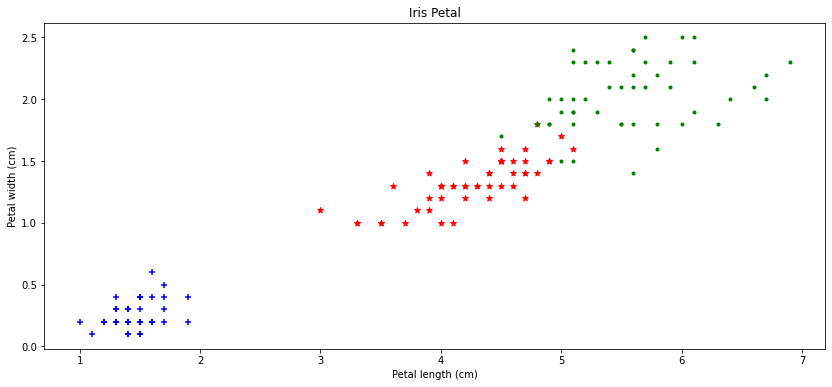

In [19]:
plt.figure(figsize=(14,6))
plt.title('Iris Petal')
plt.xlabel('Petal length (cm)')
plt.ylabel('Petal width (cm)')
plt.scatter(df0['petal length (cm)'],df0['petal width (cm)'],marker='+',color='blue')
plt.scatter(df1['petal length (cm)'],df1['petal width (cm)'],marker='*',color='red')
plt.scatter(df2['petal length (cm)'],df2['petal width (cm)'],marker='.',color='green')

In [21]:
X = df.drop(['target','flower'],axis='columns') # for future, we drop the target and flower columns
y = df.target # Y for target

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2) # we train the model

In [24]:
# LINEAR REGRESSION MODEL

linear = LinearRegression()
linear.fit(X_train,y_train)

LinearRegression()

In [25]:
y_linear = linear.predict(X_test)

In [26]:
# LOGISTIC REGRESSION MODEL

logs = LogisticRegression()
logs.fit(X_train,y_train)

LogisticRegression()

In [27]:
y_logs = logs.predict(X_test)

In [28]:
# Decision TREE

tree = DecisionTreeClassifier()
tree.fit(X_train,y_train)

DecisionTreeClassifier()

In [29]:
y_tree = tree.predict(X_test)

In [30]:
# SVM

svm = SVC()
svm.fit(X_train,y_train)

SVC()

In [31]:
y_svm = svm.predict(X_test)

In [32]:
from sklearn.metrics import r2_score
r2_linear = r2_score(y_test,y_linear)
r2_logs = r2_score(y_test,y_logs)
r2_tree = r2_score(y_test,y_tree)
r2_svm = r2_score(y_test,y_svm)

In [33]:
print(f'Linear Regression : {r2_linear}')
print(f'Logistic Regression : {r2_logs}')
print(f'D Tree : {r2_tree}')
print(f'SVM : {r2_svm}')

Linear Regression : 0.9430723263226004
Logistic Regression : 0.9545454545454546
D Tree : 0.9545454545454546
SVM : 1.0


In [34]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=20)
forest.fit(X_train, y_train)

RandomForestClassifier(n_estimators=20)

In [35]:
forest.score(X_train,y_train)

1.0

# for the best model in Iris dataset is SVM or Random forest, which has perfect score